In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import nltk
import datetime
import spacy
import en_core_web_lg
import preprocessor as p
import wordninja
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect_langs
from textblob import TextBlob

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
nlp = en_core_web_lg.load()

In [3]:
trump = pd.read_excel('to_trump.xlsx').dropna(how='all')
trump.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,MSieron,mike sieron,4.545687e+08,1.263983e+18,/MSieron/status/1263982976456699906,2020-05-22 23:59:59,1.590192e+09,Please comment on what your racist opponent sa...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,0.0,0.0,1.0,1.263981e+18,"[{'screen_name': 'realDonaldTrump', 'user_id':..."
2,AngelSa20236712,AJS TX,1.249376e+18,1.263983e+18,/AngelSa20236712/status/1263982976175607810,2020-05-22 23:59:59,1.590192e+09,Like now I can call you clown. The same @real...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,0.0,0.0,1.0,1.263967e+18,"[{'screen_name': 'ddale8', 'user_id': '2252656..."
4,SenJohnHoeven,Senator John Hoeven,3.827911e+08,1.263983e+18,/SenJohnHoeven/status/1263982975479435266,2020-05-22 23:59:59,1.590192e+09,"Along with @SenKevinCramer & @RepArmstrongND, ...","<p class=""TweetTextSize js-tweet-text tweet-te...",['https://twitter.com/DougBurgum/status/126396...,...,0.0,[],NaN,8.0,4.0,14.0,1.0,0.0,NaN,[]
6,aa_watsup,carmine cioffi,2.243262e+09,1.263983e+18,/aa_watsup/status/1263982974774718466,2020-05-22 23:59:59,1.590192e+09,Is this the nurse that appeared on CNN crying ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,1.0,0.0,1.0,1.0,1.0,1.263971e+18,"[{'screen_name': 'wildrover109', 'user_id': '3..."
8,Ishouldhelp,butternutmosh,2.181142e+09,1.263983e+18,/Ishouldhelp/status/1263982974703370240,2020-05-22 23:59:59,1.590192e+09,MAGA= My Adderallâ€™s Gone AWOL,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,0.0,0.0,1.0,1.263971e+18,"[{'screen_name': 'realDonaldTrump', 'user_id':..."


In [4]:
trump.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users'],
      dtype='object')

In [5]:
trump_tweets = trump[['username','text','timestamp','likes','retweets']].reset_index(drop=True)
trump_tweets.head()

,username,text,timestamp,likes,retweets
0,mike sieron,Please comment on what your racist opponent sa...,2020-05-22 23:59:59,0.0,0.0
1,AJS TX,Like now I can call you clown. The same @real...,2020-05-22 23:59:59,0.0,0.0
2,Senator John Hoeven,"Along with @SenKevinCramer & @RepArmstrongND, ...",2020-05-22 23:59:59,8.0,4.0
3,carmine cioffi,Is this the nurse that appeared on CNN crying ...,2020-05-22 23:59:59,1.0,0.0
4,butternutmosh,MAGA= My Adderallâ€™s Gone AWOL,2020-05-22 23:59:59,0.0,0.0


In [6]:
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.RESERVED,p.OPT.SMILEY)

In [7]:
trump_tweets['text_clean'] = [re.sub(r'[^\w\s]','',p.clean(str(i)).lower()) for i in trump_tweets.text]
trump_tweets.head()

,username,text,timestamp,likes,retweets,text_clean
0,mike sieron,Please comment on what your racist opponent sa...,2020-05-22 23:59:59,0.0,0.0,please comment on what your racist opponent sa...
1,AJS TX,Like now I can call you clown. The same @real...,2020-05-22 23:59:59,0.0,0.0,like now i can call you clown the same realdon...
2,Senator John Hoeven,"Along with @SenKevinCramer & @RepArmstrongND, ...",2020-05-22 23:59:59,8.0,4.0,along with senkevincramer reparmstrongnd we s...
3,carmine cioffi,Is this the nurse that appeared on CNN crying ...,2020-05-22 23:59:59,1.0,0.0,is this the nurse that appeared on cnn crying ...
4,butternutmosh,MAGA= My Adderallâ€™s Gone AWOL,2020-05-22 23:59:59,0.0,0.0,maga my adderalls gone awol


In [8]:
polarity = []
for i in trump_tweets.text_clean:
    statement = TextBlob(i)
    sentiment = statement.sentiment.polarity 
    polarity.append(sentiment)

In [9]:
trump_tweets['polarity'] = polarity
trump_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity
0,mike sieron,Please comment on what your racist opponent sa...,2020-05-22 23:59:59,0.0,0.0,please comment on what your racist opponent sa...,-0.450000
1,AJS TX,Like now I can call you clown. The same @real...,2020-05-22 23:59:59,0.0,0.0,like now i can call you clown the same realdon...,-0.125000
2,Senator John Hoeven,"Along with @SenKevinCramer & @RepArmstrongND, ...",2020-05-22 23:59:59,8.0,4.0,along with senkevincramer reparmstrongnd we s...,0.104167
3,carmine cioffi,Is this the nurse that appeared on CNN crying ...,2020-05-22 23:59:59,1.0,0.0,is this the nurse that appeared on cnn crying ...,-0.233333
4,butternutmosh,MAGA= My Adderallâ€™s Gone AWOL,2020-05-22 23:59:59,0.0,0.0,maga my adderalls gone awol,0.000000


In [10]:
trudeau = pd.read_excel('to_trudeau.xlsx').dropna(how='all')
trudeau.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,kevinnotheaven,"Kevin Durham, UE",3.523895e+08,1.258547e+18,/kevinnotheaven/status/1258547140185358336,2020-05-07 23:59:55,1.588896e+09,No good for you. They signed an extradition tr...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,0.0,0.0,1.0,1.258235e+18,"[{'screen_name': 'JustinTrudeau', 'user_id': '..."
2,Norm_Ally12,Norm Ally,1.230147e+18,1.258547e+18,/Norm_Ally12/status/1258547099446083584,2020-05-07 23:59:45,1.588896e+09,"Well , hopefully @JustinTrudeau is smart enoug...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,0.0,0.0,1.0,1.258076e+18,"[{'screen_name': 'BradWall306', 'user_id': '14..."
4,Jena__bee,á’á—©á‘Žá‘Žá—©á—·á—©á‘Žá—©á‘Žá—© ðŸ‡¨ðŸ‡¦ ðŸ‡...,7.319030e+17,1.258547e+18,/Jena__bee/status/1258547084845707266,2020-05-07 23:59:42,1.588896e+09,That's so strange. Mine didn't change at all.,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,1.0,1.0,1.0,1.258461e+18,"[{'screen_name': 'alysm745', 'user_id': '12402..."
6,immigrationNAT2,ðŸ‡¨ðŸ‡¦ immigration_NATION ðŸš« ðŸ‡ºðŸ‡³ ðŸš«,1.217647e+18,1.258547e+18,/immigrationNAT2/status/1258547068131397632,2020-05-07 23:59:38,1.588896e+09,@realDonaldTrump @ottawapolice @SenateCA @CSC_...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://twitter.com/immigrationNAT2/status/1...,...,0.0,[],NaN,1.0,0.0,0.0,0.0,0.0,NaN,[]
8,Ksloan007,K Sloan,2.213921e+08,1.258547e+18,/Ksloan007/status/1258547021192953856,2020-05-07 23:59:27,1.588896e+09,It seems Mr. Prime Minister anytime you get on...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,0.0,0.0,1.0,1.258235e+18,"[{'screen_name': 'JustinTrudeau', 'user_id': '..."


In [11]:
trudeau.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users'],
      dtype='object')

In [12]:
trudeau_tweets = trudeau[['username','text','timestamp','likes','retweets']].reset_index(drop=True)
trudeau_tweets.head()

,username,text,timestamp,likes,retweets
0,"Kevin Durham, UE",No good for you. They signed an extradition tr...,2020-05-07 23:59:55,0.0,0.0
1,Norm Ally,"Well , hopefully @JustinTrudeau is smart enoug...",2020-05-07 23:59:45,0.0,0.0
2,á’á—©á‘Žá‘Žá—©á—·á—©á‘Žá—©á‘Žá—© ðŸ‡¨ðŸ‡¦ ðŸ‡...,That's so strange. Mine didn't change at all.,2020-05-07 23:59:42,0.0,0.0
3,ðŸ‡¨ðŸ‡¦ immigration_NATION ðŸš« ðŸ‡ºðŸ‡³ ðŸš«,@realDonaldTrump @ottawapolice @SenateCA @CSC_...,2020-05-07 23:59:38,1.0,0.0
4,K Sloan,It seems Mr. Prime Minister anytime you get on...,2020-05-07 23:59:27,0.0,0.0


In [13]:
trudeau_tweets['text_clean'] = [re.sub(r'[^\w\s]','',p.clean(str(i)).lower()) for i in trudeau_tweets.text]
trudeau_tweets.head()

,username,text,timestamp,likes,retweets,text_clean
0,"Kevin Durham, UE",No good for you. They signed an extradition tr...,2020-05-07 23:59:55,0.0,0.0,no good for you they signed an extradition treaty
1,Norm Ally,"Well , hopefully @JustinTrudeau is smart enoug...",2020-05-07 23:59:45,0.0,0.0,well hopefully justintrudeau is smart enough ...
2,á’á—©á‘Žá‘Žá—©á—·á—©á‘Žá—©á‘Žá—© ðŸ‡¨ðŸ‡¦ ðŸ‡...,That's so strange. Mine didn't change at all.,2020-05-07 23:59:42,0.0,0.0,thats so strange mine didnt change at all
3,ðŸ‡¨ðŸ‡¦ immigration_NATION ðŸš« ðŸ‡ºðŸ‡³ ðŸš«,@realDonaldTrump @ottawapolice @SenateCA @CSC_...,2020-05-07 23:59:38,1.0,0.0,realdonaldtrump ottawapolice senateca csc_scc_...
4,K Sloan,It seems Mr. Prime Minister anytime you get on...,2020-05-07 23:59:27,0.0,0.0,it seems mr prime minister anytime you get on ...


In [14]:
polarity2 = []
for i in trudeau_tweets.text_clean:
    statement = TextBlob(i)
    sentiment = statement.sentiment.polarity 
    polarity2.append(sentiment)

In [15]:
trudeau_tweets['polarity'] = polarity2
trudeau_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity
0,"Kevin Durham, UE",No good for you. They signed an extradition tr...,2020-05-07 23:59:55,0.0,0.0,no good for you they signed an extradition treaty,-0.350000
1,Norm Ally,"Well , hopefully @JustinTrudeau is smart enoug...",2020-05-07 23:59:45,0.0,0.0,well hopefully justintrudeau is smart enough ...,-0.012245
2,á’á—©á‘Žá‘Žá—©á—·á—©á‘Žá—©á‘Žá—© ðŸ‡¨ðŸ‡¦ ðŸ‡...,That's so strange. Mine didn't change at all.,2020-05-07 23:59:42,0.0,0.0,thats so strange mine didnt change at all,-0.050000
3,ðŸ‡¨ðŸ‡¦ immigration_NATION ðŸš« ðŸ‡ºðŸ‡³ ðŸš«,@realDonaldTrump @ottawapolice @SenateCA @CSC_...,2020-05-07 23:59:38,1.0,0.0,realdonaldtrump ottawapolice senateca csc_scc_...,0.098148
4,K Sloan,It seems Mr. Prime Minister anytime you get on...,2020-05-07 23:59:27,0.0,0.0,it seems mr prime minister anytime you get on ...,-0.125000


In [16]:
lee = pd.read_excel('to_lee.xlsx').dropna(how='all')
lee.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,EthlynC2H4,Ethlyn YIN,6.061639e+08,1.225569e+18,/EthlynC2H4/status/1225569272056942592,2020-02-06 23:57:39,1.581033e+09,"Dear Mr. Lee,\r\nDue to virus outbreak, please...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,1.0,['https://pbs.twimg.com/media/EQIYv4RUwAADQaX....,NaN,19.0,0.0,0.0,0.0,1.0,1.224671e+18,"[{'screen_name': 'leehsienloong', 'user_id': '..."
2,evangelinaweij,Evangelina,1.175287e+18,1.225569e+18,/evangelinaweij/status/1225568884402638850,2020-02-06 23:56:06,1.581033e+09,"Dear Mr Lee, please prevent such big gathering...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,2.0,0.0,1.0,1.0,1.0,1.224671e+18,"[{'screen_name': 'leehsienloong', 'user_id': '..."
4,clverer09,"Yang Yang, David",2.670159e+07,1.225568e+18,/clverer09/status/1225567545438199808,2020-02-06 23:50:47,1.581033e+09,Urgent call off the mass gathering. 2019 nCov ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,1.0,['https://pbs.twimg.com/media/EQIXLSTUEAAX6bl....,NaN,25.0,1.0,0.0,0.0,1.0,1.224671e+18,"[{'screen_name': 'leehsienloong', 'user_id': '..."
6,Bo66725337,Bo,1.131513e+18,1.225566e+18,/Bo66725337/status/1225566373885227008,2020-02-06 23:46:08,1.581033e+09,Dear Mr Lee pls call off any parties thank u,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,1.0,0.0,0.0,0.0,1.0,1.224671e+18,"[{'screen_name': 'leehsienloong', 'user_id': '..."
8,nemomou,Nemo lee,8.849317e+08,1.225564e+18,/nemomou/status/1225563866198953985,2020-02-06 23:36:10,1.581032e+09,"Pls stop it, itâ€™s really dangerous...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,1.0,0.0,0.0,0.0,1.0,1.224671e+18,"[{'screen_name': 'leehsienloong', 'user_id': '..."


In [17]:
lee.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users'],
      dtype='object')

In [18]:
lee_tweets = lee[['username','text','timestamp','likes','retweets']].reset_index(drop=True)
lee_tweets.head()

,username,text,timestamp,likes,retweets
0,Ethlyn YIN,"Dear Mr. Lee,\r\nDue to virus outbreak, please...",2020-02-06 23:57:39,19.0,0.0
1,Evangelina,"Dear Mr Lee, please prevent such big gathering...",2020-02-06 23:56:06,2.0,0.0
2,"Yang Yang, David",Urgent call off the mass gathering. 2019 nCov ...,2020-02-06 23:50:47,25.0,1.0
3,Bo,Dear Mr Lee pls call off any parties thank u,2020-02-06 23:46:08,1.0,0.0
4,Nemo lee,"Pls stop it, itâ€™s really dangerous...",2020-02-06 23:36:10,1.0,0.0


In [19]:
lee_tweets['text_clean'] = [re.sub(r'[^\w\s]','',p.clean(str(i)).lower()) for i in lee_tweets.text]
lee_tweets.head()

,username,text,timestamp,likes,retweets,text_clean
0,Ethlyn YIN,"Dear Mr. Lee,\r\nDue to virus outbreak, please...",2020-02-06 23:57:39,19.0,0.0,dear mr lee due to virus outbreak please consi...
1,Evangelina,"Dear Mr Lee, please prevent such big gathering...",2020-02-06 23:56:06,2.0,0.0,dear mr lee please prevent such big gatherings...
2,"Yang Yang, David",Urgent call off the mass gathering. 2019 nCov ...,2020-02-06 23:50:47,25.0,1.0,urgent call off the mass gathering 2019 ncov i...
3,Bo,Dear Mr Lee pls call off any parties thank u,2020-02-06 23:46:08,1.0,0.0,dear mr lee pls call off any parties thank u
4,Nemo lee,"Pls stop it, itâ€™s really dangerous...",2020-02-06 23:36:10,1.0,0.0,pls stop it its really dangerous


In [20]:
polarity3 = []
for i in lee_tweets.text_clean:
    statement = TextBlob(i)
    sentiment = statement.sentiment.polarity 
    polarity3.append(sentiment)

In [21]:
lee_tweets['polarity'] = polarity3
lee_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity
0,Ethlyn YIN,"Dear Mr. Lee,\r\nDue to virus outbreak, please...",2020-02-06 23:57:39,19.0,0.0,dear mr lee due to virus outbreak please consi...,0.050595
1,Evangelina,"Dear Mr Lee, please prevent such big gathering...",2020-02-06 23:56:06,2.0,0.0,dear mr lee please prevent such big gatherings...,0.000000
2,"Yang Yang, David",Urgent call off the mass gathering. 2019 nCov ...,2020-02-06 23:50:47,25.0,1.0,urgent call off the mass gathering 2019 ncov i...,0.133333
3,Bo,Dear Mr Lee pls call off any parties thank u,2020-02-06 23:46:08,1.0,0.0,dear mr lee pls call off any parties thank u,0.000000
4,Nemo lee,"Pls stop it, itâ€™s really dangerous...",2020-02-06 23:36:10,1.0,0.0,pls stop it its really dangerous,-0.600000


In [22]:
modi = pd.read_excel('to_modi.xlsx').dropna(how='all')
modi.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,raosaveraS,S.V.RAO,4.477246e+08,1.217597e+18,/raosaveraS/status/1217597198365425665,2020-01-15 23:59:28,1.579133e+09,Pai World is watching India in dismay India ga...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,0.0,0.0,1.0,1.217472e+18,"[{'screen_name': 'TVMohandasPai', 'user_id': '..."
2,RiyazSharief4,Riyaz Sharief,1.130309e+18,1.217597e+18,/RiyazSharief4/status/1217597178664955905,2020-01-15 23:59:23,1.579133e+09,@narendramodi there is no Single tweet from yo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,2.0,1.0,0.0,0.0,0.0,NaN,[]
4,VikramC68042885,Vikram Chand,1.183638e+18,1.217597e+18,/VikramC68042885/status/1217596975144718337,2020-01-15 23:58:35,1.579133e+09,Increased seats in every institute....,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,0.0,0.0,1.0,1.217365e+18,"[{'screen_name': 'mygovindia', 'user_id': '268..."
6,pareekindia,SUNIL PAREEK,2.355122e+09,1.217597e+18,/pareekindia/status/1217596862791737345,2020-01-15 23:58:08,1.579133e+09,"Country achieved Independence in 1947, Goans t...","<p class=""TweetTextSize js-tweet-text tweet-te...",['https://twitter.com/ndtv/status/121751399443...,...,0.0,[],NaN,1.0,0.0,0.0,0.0,0.0,NaN,[]
8,SidAAP,Sid,1.851324e+08,1.217597e+18,/SidAAP/status/1217596791975268353,2020-01-15 23:57:51,1.579133e+09,"Sir, I have limited knowledge of Islam and whe...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,1.0,1.0,1.0,1.216060e+18,"[{'screen_name': 'DrAnuragAgrawa1', 'user_id':..."


In [23]:
modi.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users'],
      dtype='object')

In [24]:
modi_tweets = modi[['username','text','timestamp','likes','retweets']].reset_index(drop=True)
modi_tweets.head()

,username,text,timestamp,likes,retweets
0,S.V.RAO,Pai World is watching India in dismay India ga...,2020-01-15 23:59:28,0.0,0.0
1,Riyaz Sharief,@narendramodi there is no Single tweet from yo...,2020-01-15 23:59:23,2.0,1.0
2,Vikram Chand,Increased seats in every institute....,2020-01-15 23:58:35,0.0,0.0
3,SUNIL PAREEK,"Country achieved Independence in 1947, Goans t...",2020-01-15 23:58:08,1.0,0.0
4,Sid,"Sir, I have limited knowledge of Islam and whe...",2020-01-15 23:57:51,0.0,0.0


In [25]:
modi_tweets['text_clean'] = [re.sub(r'[^\w\s]','',p.clean(str(i)).lower()) for i in modi_tweets.text]
modi_tweets.head()

,username,text,timestamp,likes,retweets,text_clean
0,S.V.RAO,Pai World is watching India in dismay India ga...,2020-01-15 23:59:28,0.0,0.0,pai world is watching india in dismay india ga...
1,Riyaz Sharief,@narendramodi there is no Single tweet from yo...,2020-01-15 23:59:23,2.0,1.0,narendramodi there is no single tweet from you...
2,Vikram Chand,Increased seats in every institute....,2020-01-15 23:58:35,0.0,0.0,increased seats in every institute
3,SUNIL PAREEK,"Country achieved Independence in 1947, Goans t...",2020-01-15 23:58:08,1.0,0.0,country achieved independence in 1947 goans ta...
4,Sid,"Sir, I have limited knowledge of Islam and whe...",2020-01-15 23:57:51,0.0,0.0,sir i have limited knowledge of islam and when...


In [26]:
polarity4 = []
for i in modi_tweets.text_clean:
    statement = TextBlob(i)
    sentiment = statement.sentiment.polarity 
    polarity4.append(sentiment)

In [27]:
modi_tweets['polarity'] = polarity4
modi_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity
0,S.V.RAO,Pai World is watching India in dismay India ga...,2020-01-15 23:59:28,0.0,0.0,pai world is watching india in dismay india ga...,-0.033333
1,Riyaz Sharief,@narendramodi there is no Single tweet from yo...,2020-01-15 23:59:23,2.0,1.0,narendramodi there is no single tweet from you...,0.011905
2,Vikram Chand,Increased seats in every institute....,2020-01-15 23:58:35,0.0,0.0,increased seats in every institute,0.000000
3,SUNIL PAREEK,"Country achieved Independence in 1947, Goans t...",2020-01-15 23:58:08,1.0,0.0,country achieved independence in 1947 goans ta...,0.000000
4,Sid,"Sir, I have limited knowledge of Islam and whe...",2020-01-15 23:57:51,0.0,0.0,sir i have limited knowledge of islam and when...,0.071429


In [28]:
boris = pd.read_excel('to_boris.xlsx').dropna(how='all')
boris.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,bgste,Steve Williams,2.093545e+07,1.244776e+18,/bgste/status/1244776342073335808,2020-03-30 23:59:41,1.585613e+09,"Let it go, let it gooooo!!","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,0.0,0.0,1.0,1.243710e+18,"[{'screen_name': 'hoochachook', 'user_id': '82..."
2,CryptoHypto1,CryptoHypto,1.091246e+18,1.244776e+18,/CryptoHypto1/status/1244776324868321280,2020-03-30 23:59:37,1.585613e+09,Many of my friends and people i knkow had coug...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,1.0,1.0,1.0,1.244264e+18,"[{'screen_name': 'lmldias', 'user_id': '395236..."
4,john606sc,John R,4.667243e+08,1.244776e+18,/john606sc/status/1244776199043366912,2020-03-30 23:59:07,1.585613e+09,Iâ€™m not really a gaming kind of person. But ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,0.0,0.0,2.0,1.0,1.0,1.244773e+18,"[{'screen_name': 'LowfieldsLad77', 'user_id': ..."
6,smakhanian,Shannon Makhanian,7.235153e+08,1.244776e+18,/smakhanian/status/1244776163379044352,2020-03-30 23:58:58,1.585613e+09,The Knights of The Templar ride again! F+Ã—+ t...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,4.0,2.0,1.0,1.0,1.0,1.217552e+18,"[{'screen_name': 'TaWoDiUsdi', 'user_id': '102..."
8,JayGee47505179,JayGee,1.180584e+18,1.244776e+18,/JayGee47505179/status/1244776082093441025,2020-03-30 23:58:39,1.585613e+09,Yeah. That was super helpful for reporting th...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,0.0,[],NaN,7.0,0.0,0.0,0.0,1.0,1.244332e+18,"[{'screen_name': 'SuspendDisbeli2', 'user_id':..."


In [29]:
boris.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users'],
      dtype='object')

In [30]:
boris_tweets = boris[['username','text','timestamp','likes','retweets']].reset_index(drop=True)
boris_tweets.head()

,username,text,timestamp,likes,retweets
0,Steve Williams,"Let it go, let it gooooo!!",2020-03-30 23:59:41,0.0,0.0
1,CryptoHypto,Many of my friends and people i knkow had coug...,2020-03-30 23:59:37,0.0,0.0
2,John R,Iâ€™m not really a gaming kind of person. But ...,2020-03-30 23:59:07,0.0,0.0
3,Shannon Makhanian,The Knights of The Templar ride again! F+Ã—+ t...,2020-03-30 23:58:58,4.0,2.0
4,JayGee,Yeah. That was super helpful for reporting th...,2020-03-30 23:58:39,7.0,0.0


In [31]:
boris_tweets['text_clean'] = [re.sub(r'[^\w\s]','',p.clean(str(i)).lower()) for i in boris_tweets.text]
boris_tweets.head()

,username,text,timestamp,likes,retweets,text_clean
0,Steve Williams,"Let it go, let it gooooo!!",2020-03-30 23:59:41,0.0,0.0,let it go let it gooooo
1,CryptoHypto,Many of my friends and people i knkow had coug...,2020-03-30 23:59:37,0.0,0.0,many of my friends and people i knkow had coug...
2,John R,Iâ€™m not really a gaming kind of person. But ...,2020-03-30 23:59:07,0.0,0.0,im not really a gaming kind of person but toda...
3,Shannon Makhanian,The Knights of The Templar ride again! F+Ã—+ t...,2020-03-30 23:58:58,4.0,2.0,the knights of the templar ride again f the va...
4,JayGee,Yeah. That was super helpful for reporting th...,2020-03-30 23:58:39,7.0,0.0,yeah that was super helpful for reporting the ...


In [32]:
polarity5 = []
for i in boris_tweets.text_clean:
    statement = TextBlob(i)
    sentiment = statement.sentiment.polarity 
    polarity5.append(sentiment)

In [33]:
boris_tweets['polarity'] = polarity5
boris_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity
0,Steve Williams,"Let it go, let it gooooo!!",2020-03-30 23:59:41,0.0,0.0,let it go let it gooooo,0.000000
1,CryptoHypto,Many of my friends and people i knkow had coug...,2020-03-30 23:59:37,0.0,0.0,many of my friends and people i knkow had coug...,-0.005159
2,John R,Iâ€™m not really a gaming kind of person. But ...,2020-03-30 23:59:07,0.0,0.0,im not really a gaming kind of person but toda...,0.100000
3,Shannon Makhanian,The Knights of The Templar ride again! F+Ã—+ t...,2020-03-30 23:58:58,4.0,2.0,the knights of the templar ride again f the va...,0.000000
4,JayGee,Yeah. That was super helpful for reporting th...,2020-03-30 23:58:39,7.0,0.0,yeah that was super helpful for reporting the ...,0.266667


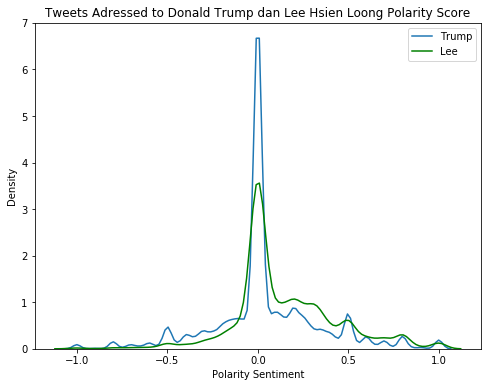

In [68]:
plt.figure(1, figsize=(8,6))
sns.distplot(trump_tweets['polarity'],label='Trump',hist=False)
#sns.distplot(trudeau_tweets['polarity'],label='Trudeau',hist=False)
sns.distplot(lee_tweets['polarity'],label='Lee',hist=False,color='green')
#sns.distplot(modi_tweets['polarity'],label='Modi',hist=False)
#sns.distplot(boris_tweets['polarity'],label='Boris',hist=False)
plt.ylabel('Density')
plt.xlabel('Polarity Sentiment')
plt.title('Tweets Adressed to Donald Trump dan Lee Hsien Loong Polarity Score')
plt.legend()
#plt.savefig('Tweets Adressed to Donald Trump dan Lee Hsien Loong Polarity Score.png')

In [35]:
print(len(boris_tweets[boris_tweets.polarity<0]))
print(len(trump_tweets[trump_tweets.polarity<0]))
print(len(trudeau_tweets[trudeau_tweets.polarity<0]))
print(len(modi_tweets[modi_tweets.polarity<0]))
print(len(lee_tweets[lee_tweets.polarity<0]))

3574
3655
3585
2871
1377


In [36]:
neg = [len(boris_tweets[boris_tweets.polarity<0]),
      len(trump_tweets[trump_tweets.polarity<0]),
      len(trudeau_tweets[trudeau_tweets.polarity<0]),
      len(modi_tweets[modi_tweets.polarity<0]),
      len(lee_tweets[lee_tweets.polarity<0])]

In [37]:
pos = [len(boris_tweets[boris_tweets.polarity>0]),
      len(trump_tweets[trump_tweets.polarity>0]),
      len(trudeau_tweets[trudeau_tweets.polarity>0]),
      len(modi_tweets[modi_tweets.polarity>0]),
      len(lee_tweets[lee_tweets.polarity>0])]

In [38]:
neu = [len(boris_tweets[boris_tweets.polarity==0]),
      len(trump_tweets[trump_tweets.polarity==0]),
      len(trudeau_tweets[trudeau_tweets.polarity==0]),
      len(modi_tweets[modi_tweets.polarity==0]),
      len(lee_tweets[lee_tweets.polarity==0])]

In [39]:
name = ['boris','trump','trudeau','modi','lee']

In [40]:
df_polarity = pd.DataFrame([name,neg,neu,pos]).rename({0:'Name',1:'Negative',2:'Neutral',3:'Positive'}).transpose()
df_polarity.head()

,Name,Negative,Neutral,Positive
0,boris,3574,5149,5572
1,trump,3655,5478,5207
2,trudeau,3585,4891,5920
3,modi,2871,4966,6317
4,lee,1377,2750,4710


In [41]:
df_polarity['Neg_p'] = (df_polarity['Negative']/(df_polarity['Negative']+df_polarity['Neutral']+df_polarity['Positive']))*100
df_polarity['Neu_p'] = (df_polarity['Neutral']/(df_polarity['Negative']+df_polarity['Neutral']+df_polarity['Positive']))*100
df_polarity['Pos_p'] = (df_polarity['Positive']/(df_polarity['Negative']+df_polarity['Neutral']+df_polarity['Positive']))*100
df_polarity.head()

,Name,Negative,Neutral,Positive,Neg_p,Neu_p,Pos_p
0,boris,3574,5149,5572,25.0017,36.0196,38.9787
1,trump,3655,5478,5207,25.4881,38.2008,36.311
2,trudeau,3585,4891,5920,24.9028,33.9747,41.1225
3,modi,2871,4966,6317,20.284,35.0855,44.6305
4,lee,1377,2750,4710,15.5822,31.1192,53.2986


In [42]:
df_polarity2 = df_polarity.drop(columns=['Negative','Neutral','Positive'])
df_polarity2.head()

,Name,Neg_p,Neu_p,Pos_p
0,boris,25.0017,36.0196,38.9787
1,trump,25.4881,38.2008,36.311
2,trudeau,24.9028,33.9747,41.1225
3,modi,20.284,35.0855,44.6305
4,lee,15.5822,31.1192,53.2986


In [43]:
df_polarity3 = df_polarity2.drop(index=[0,2,3])

In [44]:
df_polarity_stack = pd.DataFrame(df_polarity3.set_index('Name').stack()).reset_index()
df_polarity_stack = df_polarity_stack.rename(columns={'level_1':'Polarity',0:'Frequency'})
df_polarity_stack.head()

,Name,Polarity,Frequency
0,trump,Neg_p,25.4881
1,trump,Neu_p,38.2008
2,trump,Pos_p,36.311
3,lee,Neg_p,15.5822
4,lee,Neu_p,31.1192


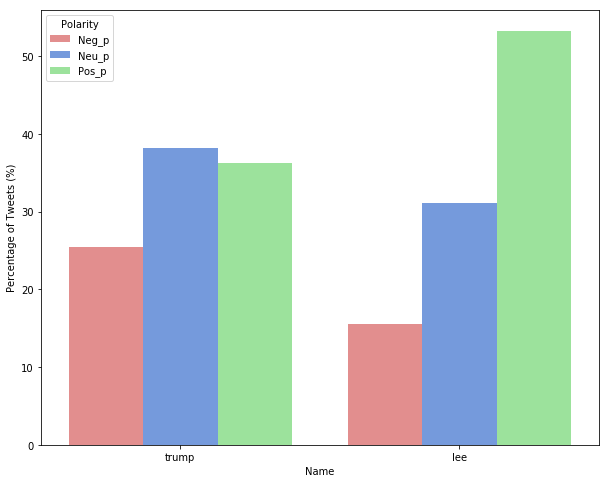

In [45]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Name", hue="Polarity", y='Frequency', data=df_polarity_stack, palette={'Neg_p':'lightcoral','Neu_p':'cornflowerblue','Pos_p':'lightgreen'})
plt.ylabel('Percentage of Tweets (%)')
plt.show()

In [46]:
print(len(trump_tweets))
print(len(modi_tweets))
print(len(boris_tweets))
print(len(lee_tweets))
print(len(trudeau_tweets))

14340
14154
14295
8837
14396


In [47]:
trump_tweets['date'] = [i.date() for i in trump_tweets.timestamp]
trump_tweets['for_count'] = 1
trump_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,mike sieron,Please comment on what your racist opponent sa...,2020-05-22 23:59:59,0.0,0.0,please comment on what your racist opponent sa...,-0.450000,2020-05-22,1
1,AJS TX,Like now I can call you clown. The same @real...,2020-05-22 23:59:59,0.0,0.0,like now i can call you clown the same realdon...,-0.125000,2020-05-22,1
2,Senator John Hoeven,"Along with @SenKevinCramer & @RepArmstrongND, ...",2020-05-22 23:59:59,8.0,4.0,along with senkevincramer reparmstrongnd we s...,0.104167,2020-05-22,1
3,carmine cioffi,Is this the nurse that appeared on CNN crying ...,2020-05-22 23:59:59,1.0,0.0,is this the nurse that appeared on cnn crying ...,-0.233333,2020-05-22,1
4,butternutmosh,MAGA= My Adderallâ€™s Gone AWOL,2020-05-22 23:59:59,0.0,0.0,maga my adderalls gone awol,0.000000,2020-05-22,1


In [48]:
modi_tweets['date'] = [i.date() for i in modi_tweets.timestamp]
modi_tweets['for_count'] = 1
modi_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,S.V.RAO,Pai World is watching India in dismay India ga...,2020-01-15 23:59:28,0.0,0.0,pai world is watching india in dismay india ga...,-0.033333,2020-01-15,1
1,Riyaz Sharief,@narendramodi there is no Single tweet from yo...,2020-01-15 23:59:23,2.0,1.0,narendramodi there is no single tweet from you...,0.011905,2020-01-15,1
2,Vikram Chand,Increased seats in every institute....,2020-01-15 23:58:35,0.0,0.0,increased seats in every institute,0.000000,2020-01-15,1
3,SUNIL PAREEK,"Country achieved Independence in 1947, Goans t...",2020-01-15 23:58:08,1.0,0.0,country achieved independence in 1947 goans ta...,0.000000,2020-01-15,1
4,Sid,"Sir, I have limited knowledge of Islam and whe...",2020-01-15 23:57:51,0.0,0.0,sir i have limited knowledge of islam and when...,0.071429,2020-01-15,1


In [49]:
lee_tweets['date'] = [i.date() for i in lee_tweets.timestamp]
lee_tweets['for_count'] = 1
lee_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Ethlyn YIN,"Dear Mr. Lee,\r\nDue to virus outbreak, please...",2020-02-06 23:57:39,19.0,0.0,dear mr lee due to virus outbreak please consi...,0.050595,2020-02-06,1
1,Evangelina,"Dear Mr Lee, please prevent such big gathering...",2020-02-06 23:56:06,2.0,0.0,dear mr lee please prevent such big gatherings...,0.000000,2020-02-06,1
2,"Yang Yang, David",Urgent call off the mass gathering. 2019 nCov ...,2020-02-06 23:50:47,25.0,1.0,urgent call off the mass gathering 2019 ncov i...,0.133333,2020-02-06,1
3,Bo,Dear Mr Lee pls call off any parties thank u,2020-02-06 23:46:08,1.0,0.0,dear mr lee pls call off any parties thank u,0.000000,2020-02-06,1
4,Nemo lee,"Pls stop it, itâ€™s really dangerous...",2020-02-06 23:36:10,1.0,0.0,pls stop it its really dangerous,-0.600000,2020-02-06,1


In [50]:
trudeau_tweets['date'] = [i.date() for i in trudeau_tweets.timestamp]
trudeau_tweets['for_count'] = 1
trudeau_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,"Kevin Durham, UE",No good for you. They signed an extradition tr...,2020-05-07 23:59:55,0.0,0.0,no good for you they signed an extradition treaty,-0.350000,2020-05-07,1
1,Norm Ally,"Well , hopefully @JustinTrudeau is smart enoug...",2020-05-07 23:59:45,0.0,0.0,well hopefully justintrudeau is smart enough ...,-0.012245,2020-05-07,1
2,á’á—©á‘Žá‘Žá—©á—·á—©á‘Žá—©á‘Žá—© ðŸ‡¨ðŸ‡¦ ðŸ‡...,That's so strange. Mine didn't change at all.,2020-05-07 23:59:42,0.0,0.0,thats so strange mine didnt change at all,-0.050000,2020-05-07,1
3,ðŸ‡¨ðŸ‡¦ immigration_NATION ðŸš« ðŸ‡ºðŸ‡³ ðŸš«,@realDonaldTrump @ottawapolice @SenateCA @CSC_...,2020-05-07 23:59:38,1.0,0.0,realdonaldtrump ottawapolice senateca csc_scc_...,0.098148,2020-05-07,1
4,K Sloan,It seems Mr. Prime Minister anytime you get on...,2020-05-07 23:59:27,0.0,0.0,it seems mr prime minister anytime you get on ...,-0.125000,2020-05-07,1


In [51]:
boris_tweets['date'] = [i.date() for i in boris_tweets.timestamp]
boris_tweets['for_count'] = 1
boris_tweets.head()

,username,text,timestamp,likes,retweets,text_clean,polarity,date,for_count
0,Steve Williams,"Let it go, let it gooooo!!",2020-03-30 23:59:41,0.0,0.0,let it go let it gooooo,0.000000,2020-03-30,1
1,CryptoHypto,Many of my friends and people i knkow had coug...,2020-03-30 23:59:37,0.0,0.0,many of my friends and people i knkow had coug...,-0.005159,2020-03-30,1
2,John R,Iâ€™m not really a gaming kind of person. But ...,2020-03-30 23:59:07,0.0,0.0,im not really a gaming kind of person but toda...,0.100000,2020-03-30,1
3,Shannon Makhanian,The Knights of The Templar ride again! F+Ã—+ t...,2020-03-30 23:58:58,4.0,2.0,the knights of the templar ride again f the va...,0.000000,2020-03-30,1
4,JayGee,Yeah. That was super helpful for reporting th...,2020-03-30 23:58:39,7.0,0.0,yeah that was super helpful for reporting the ...,0.266667,2020-03-30,1


In [52]:
trump_perday = trump_tweets.groupby('date').sum()[-8:-1].for_count.mean()
modi_perday = modi_tweets.groupby('date').sum()[-8:-1].for_count.mean()
trudeau_perday = trudeau_tweets.groupby('date').sum()[-8:-1].for_count.mean()
boris_perday = boris_tweets.groupby('date').sum()[-8:-1].for_count.mean()
lee_perday = lee_tweets.groupby('date').sum()[-8:-1].for_count.mean()

In [53]:
tweets_perday = [trump_perday,modi_perday,trudeau_perday,boris_perday,lee_perday]

In [54]:
tweets_perday = [boris_perday,trump_perday,trudeau_perday,modi_perday,lee_perday]

In [55]:
df_tweets_perday = pd.DataFrame([name,tweets_perday]).transpose().rename(columns={0:'Name',1:'Tweets_per_day'})
df_tweets_perday

,Name,Tweets_per_day
0,boris,724.429
1,trump,716.714
2,trudeau,776.571
3,modi,762.714
4,lee,61.8571


Text(0, 0.5, 'Name')

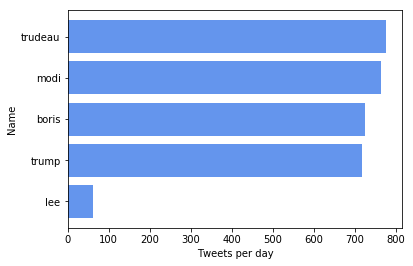

In [56]:
df_tweets_perday.sort_values('Tweets_per_day',inplace=True)
plt.barh(df_tweets_perday.Name,df_tweets_perday.Tweets_per_day,color='cornflowerblue',align='center')
plt.xlabel('Tweets per day')
plt.ylabel('Name')

In [57]:
sum_tweets = len(trump_tweets) + len(trudeau_tweets) + len(modi_tweets) + len(boris_tweets) + len(lee_tweets)

In [58]:
print(len(trump_tweets)/sum_tweets)
print(len(trudeau_tweets)/sum_tweets)
print(len(modi_tweets)/sum_tweets)
print(len(boris_tweets)/sum_tweets)
print(len(lee_tweets)/sum_tweets)

0.2172003271636727
0.2180485292781194
0.21438308442640333
0.21651873617884948
0.13384932295295507
